In [1]:
import pandas as pd
import numpy as np
student = pd.read_csv("student.csv")

In [2]:
grades = []

for row in student['G3']:
  if row>=16:
    grades.append("O")
  elif row>12:
    grades.append("A")
  elif row>8:
    grades.append("B")
  else:
    grades.append("F")
        
student['grades'] = grades

In [3]:
corr_matrix = student.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(student, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 519
Rows in test set: 130



In [5]:
student_label = train_set["grades"].copy()
student_features = train_set.drop(["grades","G3","age"], axis=1)

In [6]:
student_features = pd.get_dummies(student_features, drop_first=True)
# student_features.info()
student_features.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes,romantic_yes
332,2,2,1,3,0,4,3,3,1,2,...,0,1,0,0,1,0,0,1,1,0
29,4,4,1,2,0,4,4,5,5,5,...,0,1,0,0,1,1,1,1,1,1
302,3,2,1,3,0,5,3,2,1,1,...,0,1,0,0,0,0,1,1,0,0
286,2,1,1,1,0,4,4,2,2,4,...,0,1,0,0,0,0,0,1,1,0
554,1,1,2,1,0,3,5,5,2,2,...,0,0,0,0,1,0,1,0,1,1


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#     ('std_scaler', StandardScaler()),
])

In [8]:
student_features = my_pipeline.fit_transform(student_features)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# svc = SVC(gamma='auto')
# model = GaussianNB()
# dt = DecisionTreeClassifier(criterion="entropy",max_depth=32,random_state=42)
model = BaggingClassifier(DecisionTreeClassifier(criterion="entropy",max_depth=32,random_state=42), max_samples=0.5, max_features=1.0,n_estimators = 20)
# model = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",max_depth=32,random_state=42),n_estimators = 20)
# model = RandomForestClassifier()
# model = MLPClassifier(activation="logistic",solver="sgd" ,random_state=1, max_iter=300)
# knn = KNeighborsClassifier(n_neighbors=7)
# model =  VotingClassifier(estimators=[('svc',svc),('dt',dt),('knn',knn)])
model.fit(student_features, student_label)


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=32,
                                                        random_state=42),
                  max_samples=0.5, n_estimators=20)

In [10]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, student_features, student_label, scoring="neg_mean_squared_error", cv=10)
# rmse_scores = np.sqrt(-scores)

In [11]:
student_label_test = test_set["grades"].copy()
student_features_test = test_set.drop(["grades","G3","age"], axis=1)
student_features_test = pd.get_dummies(student_features_test, drop_first=True)

In [12]:
student_features_test = my_pipeline.fit_transform(student_features_test)
# student_label_test = my_pipeline.fit_transform([student_label_test])

# print(student_features_test)

In [13]:
final_predictions = model.predict(student_features_test)
print(final_predictions)

['O' 'B' 'O' 'B' 'B' 'O' 'O' 'B' 'B' 'B' 'O' 'B' 'A' 'B' 'B' 'A' 'B' 'F'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'F' 'B' 'B' 'O' 'O' 'A' 'F' 'F' 'O' 'A'
 'A' 'A' 'A' 'B' 'A' 'B' 'F' 'B' 'A' 'A' 'O' 'B' 'A' 'B' 'B' 'B' 'A' 'B'
 'B' 'O' 'B' 'B' 'B' 'B' 'B' 'B' 'O' 'A' 'A' 'O' 'B' 'B' 'B' 'B' 'A' 'A'
 'A' 'O' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'O' 'F' 'B' 'O' 'B' 'F' 'A' 'A'
 'A' 'B' 'B' 'O' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'B'
 'B' 'A' 'A' 'B' 'B' 'B' 'F' 'B' 'B' 'O' 'A' 'B' 'A' 'F' 'A' 'A' 'A' 'F'
 'O' 'B' 'A' 'B']


In [14]:
print(student_label_test)

636    O
220    B
594    O
429    B
72     B
      ..
514    F
374    O
444    B
244    B
601    B
Name: grades, Length: 130, dtype: object


In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(student_label_test,final_predictions))

0.8384615384615385


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, student_features_test, student_label_test, cv=10)
print(scores.mean())

0.7615384615384616


In [17]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

Training Accuracy is:  0.928709055876686
Testing Accuracy is:  0.8384615384615385


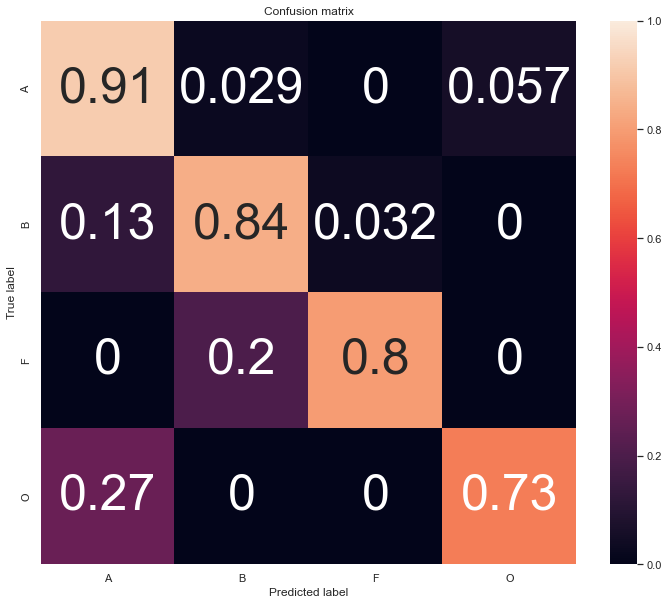

In [19]:
# from sklearn.neighbors import KNeighborsClassifier

prediction_test = model.predict(student_features_test)
print("Training Accuracy is: ", model.score(student_features, student_label))
print("Testing Accuracy is: ", model.score(student_features_test, student_label_test))
cm = confusion_matrix(student_label_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=model.classes_)

In [20]:
from sklearn.metrics import recall_score, precision_score, f1_score
recall_score(student_label_test, prediction_test, average='weighted')

0.8384615384615385

In [21]:
precision_score(student_label_test, prediction_test, average='weighted')

0.8579106280193236

In [22]:
f1_score(student_label_test, prediction_test, average='weighted')

0.8413228311267527

In [23]:
from joblib import dump, load
dump(model, 'Student.joblib')

['Student.joblib']

In [24]:
student_features_test[0]

array([4.000000, 4.000000, 1.000000, 2.000000, 0.000000, 3.000000,
       2.000000, 4.000000, 1.000000, 4.000000, 2.000000, 4.000000,
       17.000000, 18.000000, 1.000000, 1.000000, 0.000000, 1.000000,
       0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000,
       0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000,
       1.000000, 0.000000])

In [25]:
from joblib import dump, load
import numpy as np
model = load('Student.joblib') 
features = np.array([student_features_test[1]])
model.predict(features)

array(['B'], dtype=object)